In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Cleaned_StudentsPerformance.csv to Cleaned_StudentsPerformance.csv


In [ ]:
import pandas as pd

data = pd.read_csv("Cleaned_StudentsPerformance.csv")
data.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
data.columns.tolist()


['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [ ]:
data['average_score'] = (data['math score'] + data['reading score'] + data['writing score']) / 3
data[['math score','reading score','writing score','average_score']].head()


,math score,reading score,writing score,average_score
0,72,72,74,72.666667
1,69,90,88,82.333333
2,90,95,93,92.666667
3,47,57,44,49.333333
4,76,78,75,76.333333


In [ ]:
X = data[['math score','reading score','writing score']]


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

data[['math score','reading score','writing score','cluster']].head()


,math score,reading score,writing score,cluster
0,72,72,74,0
1,69,90,88,1
2,90,95,93,1
3,47,57,44,2
4,76,78,75,1


In [ ]:
kmeans.cluster_centers_


array([[65.19772727, 68.32727273, 67.69545455],
       [81.66134185, 84.98083067, 84.02555911],
       [47.94331984, 50.63157895, 48.4534413 ]])

| Cluster | Interpretation               |
| ------- | ---------------------------- |
| 0       | **Low scorers** (Weak)       |
| 1       | **Medium scorers** (Average) |
| 2       | **High scorers** (Toppers)   |


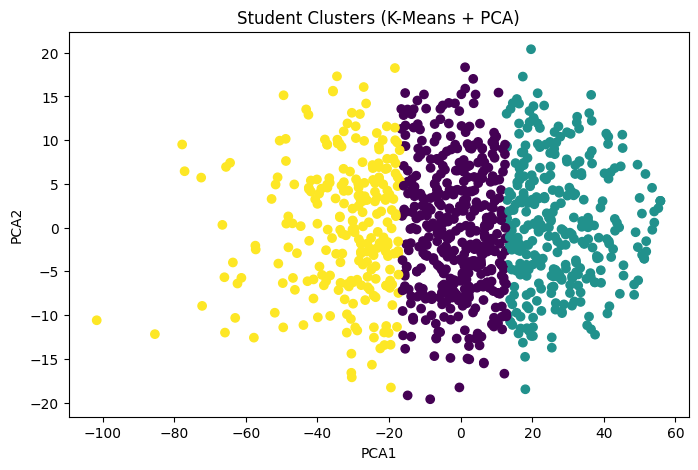

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

data['PCA1'] = pca_result[:,0]
data['PCA2'] = pca_result[:,1]

plt.figure(figsize=(8,5))
plt.scatter(data['PCA1'], data['PCA2'], c=data['cluster'], cmap='viridis')
plt.title("Student Clusters (K-Means + PCA)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()


In [ ]:
data.groupby('cluster')['average_score'].mean()


,average_score
cluster,
0,67.073485
1,83.555911
2,49.009447


In this assignment, I applied K-Means Clustering on student performance data using math, reading, and writing scores.

The model grouped the students into 3 clusters:

Cluster 0: Low-performing (Weak) students who need academic support

Cluster 1: Average students with moderate performance

Cluster 2: High-performing students (Toppers)

I used PCA to visualize the clusters in a 2D scatter plot.
The clustering clearly shows performance levels among students, which can help teachers provide targeted support to weak students and encourage high performers.